### 线性SVM

In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns #这个包的作用
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('/Users/mac/Desktop/ml/ex6data1.mat')
print(mat.keys())
X = mat['X'] #用于绘制边界
data = pd.DataFrame(mat.get('X'), columns = ['X1', 'X2'])
data['y'] = mat.get('y')
data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [3]:
print (data.keys())

Index(['X1', 'X2', 'y'], dtype='object')


### 可视化数据

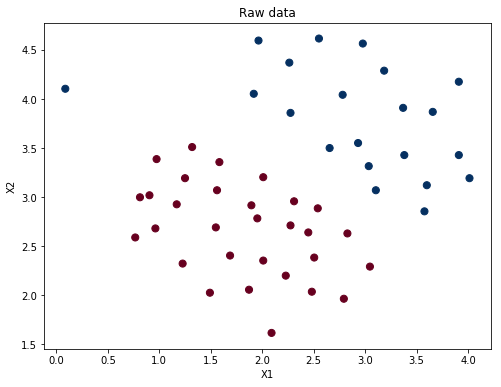

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
#scatter（输入量x1，输入量x2，点的大小，颜色序列，colormap）
ax.scatter(data['X1'], data['X2'], s = 50, c = data['y'], cmap = 'RdBu') #s为点的大小 根据c点分成两种颜色
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

### 正则参数C为1

In [5]:
svc1 = sklearn.svm.LinearSVC(C = 1, loss='hinge') #损失函数为hinge
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y']) #精确度

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [6]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']]) #decision_function计算点到超平面的距离

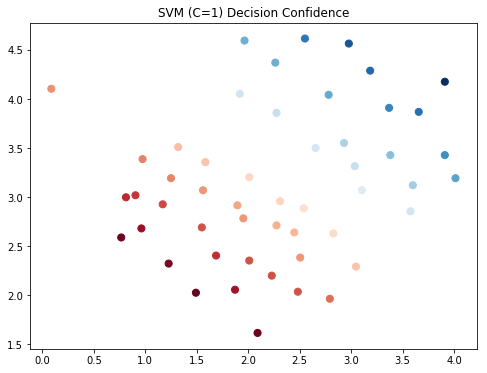

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu') #颜色的变化，表示度的变化
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

### 正则参数C为100

In [8]:
svc1 = sklearn.svm.LinearSVC(C = 100, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

In [9]:
data['SVM100 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

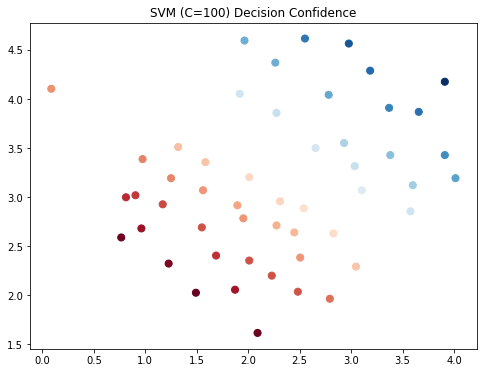

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

In [11]:
'''画出决策边界'''
def plot_boundary(clf, x1):
    u = np.linspace(np.min(x1[:,0]), np.max(x1[:,0]), 500) #为了后面可以直接调用这个函数
    v = np.linspace(np.min(x1[:,1]), np.max(x1[:,1]), 500)
    x, y = np.meshgrid(u, v) #转为网格（500*500）
    z = clf.predict(np.c_[x.flatten(), y.flatten()]) #因为predict中是要输入一个二维的数据，因此需要展开
    z = z.reshape(x.shape) #重新转为网格
    plt.contour(x, y, z, 1, colors='b') #画等高线
    plt.title('The Decision Boundary')
    plt.show

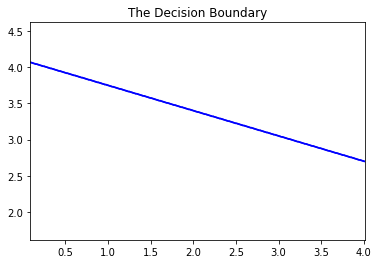

In [18]:
#fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
#ax.set_title('SVM (C=100) Decision Confidence')
#plt.show()
plot_boundary(svc1, X)

### 两次正则的比较

大间距分类器，正则化因子常数𝐶设置的非常大，从而最大间距地分离开正样本和负样本.

当𝐶不是非常非常大的时候，它可以忽略掉一些异常点的影响， 得到更好的决策界。甚至当你的数据不是线性可分的时候，支持向量机也可以给出好的结果.

𝐶较大时，可能导致过拟合；𝐶较小时，可能会导致低拟合；

In [13]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.799361,3.632169
1,2.2753,3.8589,1,0.381798,1.702144
2,2.9781,4.5651,1,1.374109,4.622677
3,2.9320,3.5519,1,0.519638,1.461833
4,3.5772,2.8560,1,0.333169,0.014912
